#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import configparser

In [3]:
# Standard plotly imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.subplots import make_subplots
# import plotly.graph_objects as go
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

Activate the interactive mode for all series and dataframes

In [4]:
import itables.options as opt

opt.maxBytes = "1MB"


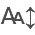

In [5]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [6]:
from itables import show

Get credentials

In [7]:
config = configparser.ConfigParser()
config.read(r'C:\Python\config.ini')

['C:\\Python\\config.ini']

## Import data

Read dataframe from a parquet file

In [8]:
df = pd.read_parquet("output_formats/data.parquet")

In [9]:
df

short_name                                        long_name  \
0     EV PLUS Sp. z o.o.  EV PLUS Spółka z ograniczoną odpowiedzialnością   
1     EV PLUS Sp. z o.o.  EV PLUS Spółka z ograniczoną odpowiedzialnością   
2     EV PLUS Sp. z o.o.  EV PLUS Spółka z ograniczoną odpowiedzialnością   
3     EV PLUS Sp. z o.o.  EV PLUS Spółka z ograniczoną odpowiedzialnością   
4     EV PLUS Sp. z o.o.  EV PLUS Spółka z ograniczoną odpowiedzialnością   
...                  ...                                              ...   
7506        Leroy Merlin               Leroy Merlin Inwestycje Sp. z o.o.   
7507        Leroy Merlin               Leroy Merlin Inwestycje Sp. z o.o.   
7508        Leroy Merlin               Leroy Merlin Inwestycje Sp. z o.o.   
7509        Leroy Merlin               Leroy Merlin Inwestycje Sp. z o.o.   
7510        Leroy Merlin               Leroy Merlin Inwestycje Sp. z o.o.   

     station_type  station_power  station_id charge_point_type  \
0              AC           11.0        1155                AC   
1              AC           11.0        1156                AC   
2              DC           40.0        1161                DC   
3              DC           40.0        1161                AC   
4              AC           22.0        1167                AC   
...           ...            ...         ...               ...   
7506           AC           22.0      118155                AC   
7507           AC           22.0      118298                AC   
7508           AC           22.0      118298                AC   
7509           AC           22.0      118299                AC   
7510           AC           22.0      118299                AC   

      charge_point_power  pool_id location_code  longitude_x  latitude_x  \
0                   11.0      242      EVP01004    16.972012   52.400204   
1                   11.0      242      EVP01004    16.972012   52.400204   
2                   40.0      246      EVP01008    17.200867   52.809794   
3                   22.0      246      EVP01008    17.200867   52.809794   
4                   22.0      250      EVP01013    16.875305   51.552733   
...                  ...      ...           ...          ...         ...   
7506                22.0    94902      C5A2D517    19.845784   50.107474   
7507                22.0    95013      4B9EC0C2    16.177517   54.235790   
7508                22.0    95013      4B9EC0C2    16.177517   54.235790   
7509                22.0    95013      4B9EC0C2    16.177517   54.235790   
7510                22.0    95013      4B9EC0C2    16.177517   54.235790   

       location.province location.district                       street  \
0          wielkopolskie            Poznań                ul. Baraniaka   
1          wielkopolskie            Poznań                ul. Baraniaka   
2          wielkopolskie       wągrowiecki                      Średnia   
3          wielkopolskie       wągrowiecki                      Średnia   
4           dolnośląskie        trzebnicki                     Topolowa   
...                  ...               ...                          ...   
7506         małopolskie         krakowski  Profesora Adama Rożańskiego   
7507  zachodniopomorskie          Koszalin                  Koszalińska   
7508  zachodniopomorskie          Koszalin                  Koszalińska   
7509  zachodniopomorskie          Koszalin                  Koszalińska   
7510  zachodniopomorskie          Koszalin                  Koszalińska   

      house_number postal_code        city  
0               77      61-131      Poznań  
1               77      61-131      Poznań  
2          parking      62-100   Wągrowiec  
3          parking      62-100   Wągrowiec  
4     stacja paliw      55-140   Korzeńsko  
...            ...         ...         ...  
7506            34      32-085  Modlniczka  
7507             1      75-900    Koszalin  
7508             1      75-900    Koszalin  
7509             1      75-900  

We've got our data imported, it has all the necessary values, so we can start visualization.

# Visualization

- wykres dla DC wg liczby stacji na operatora - kołowy, czy inny?
- wykres dla AC wg liczby stacji na operatora - kołowy, czy inny?


## Station-Level Analysis

In this section, we focus on the overall network of charging stations. We explore their geographic distribution, types (AC vs. DC), and capacity. This foundational analysis helps us understand the infrastructure and availability of EV charging stations across different regions.

#### Data preparation

Create dataframe only for stations by dropping duplicates on station_id column. As station_type and station_power is the same for all charge_points, no relevant data will be dropped.

In [85]:
# Drop duplicates by column station_id
df_stations = df.drop_duplicates(subset=['station_id'])

### Geographical Information

#### Hexbin Heatmap

Creating a geographical distribution map of the stations can help us identify what is the concentration of the stations across the country.

In [ ]:
# Creating a GeoDataFrame from the dataframe
geometry = [Point(xy) for xy in zip(df_stations['longitude_x'], df_stations['latitude_x'])]
gdf = gpd.GeoDataFrame(df_stations, geometry=geometry)

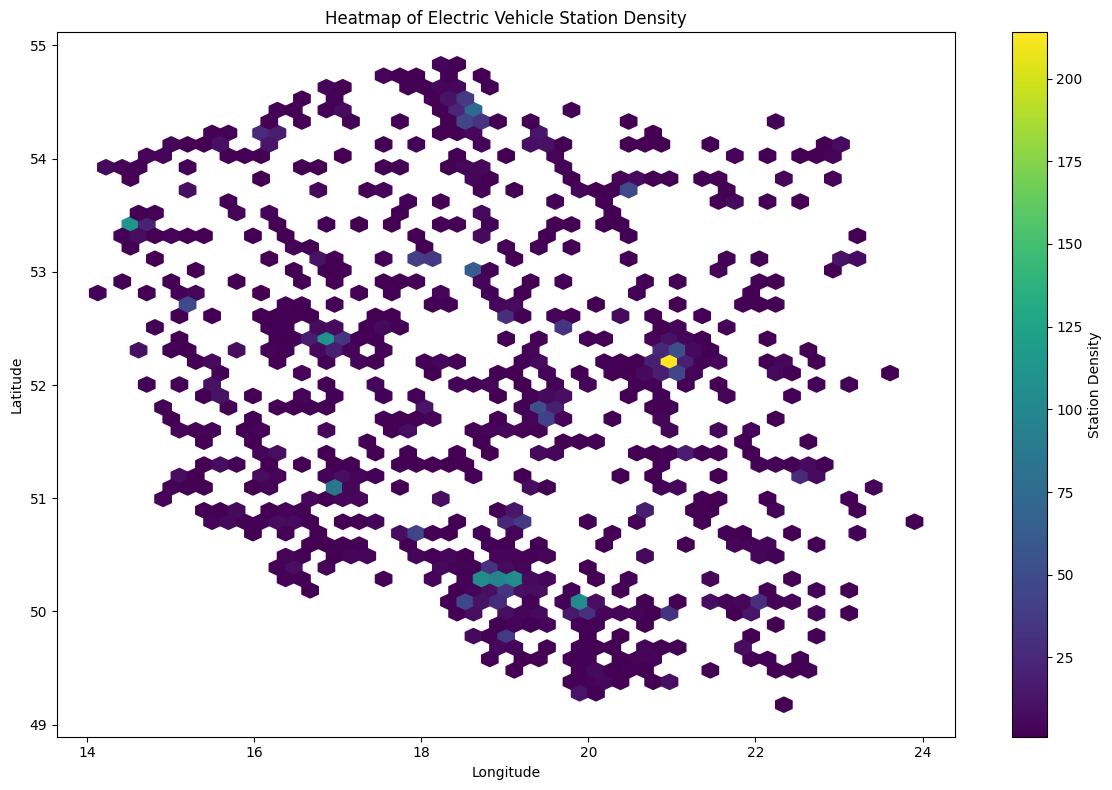

In [284]:
# Creating a heatmap of station density again
plt.figure(figsize=(12, 8))
# Using a hexbin plot to visualize the density of stations
plt.hexbin(gdf['longitude_x'], gdf['latitude_x'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Station Density')
plt.title('Heatmap of Electric Vehicle Station Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
# plt.savefig('station_density_heatmap_v2.png')
plt.show()

Let's show it in more details by changing the gridsize and adding the map of Poland in the bacground.

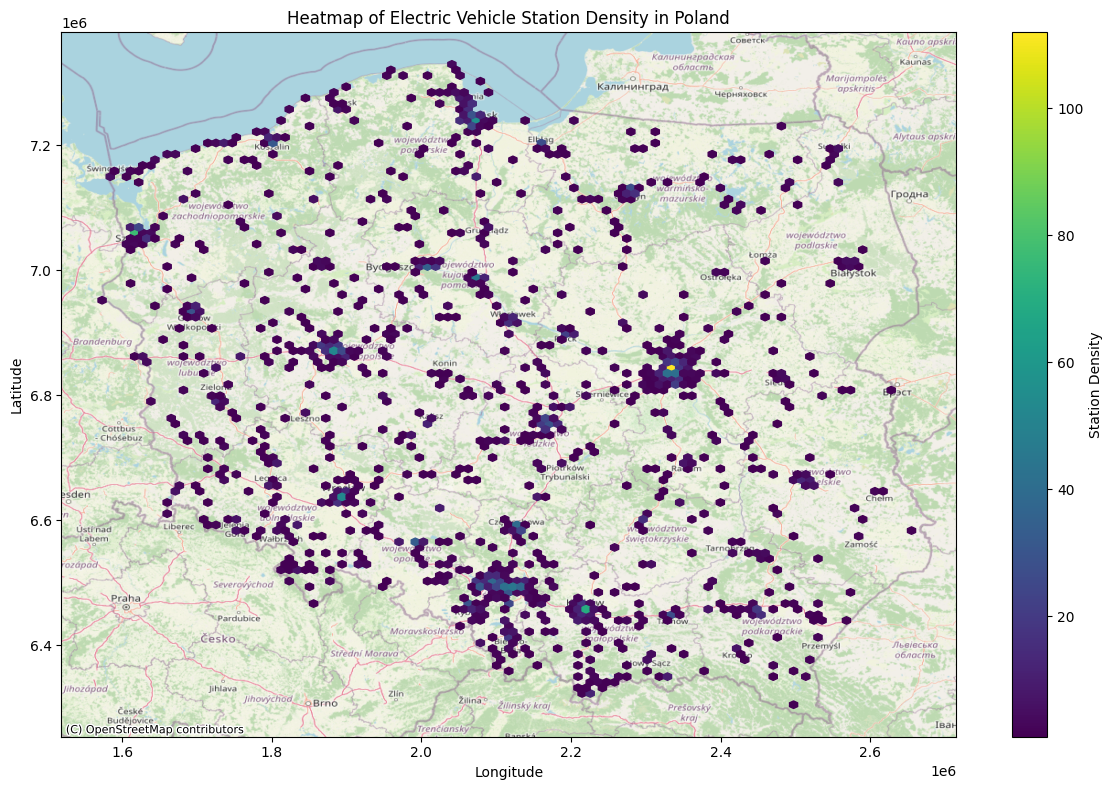

In [311]:
# Check if `gdf` has a CRS; if not, set it to EPSG:4326 (WGS84, commonly used for lat/lon)
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Transform to EPSG:3857 for compatibility with contextily's basemaps
gdf = gdf.to_crs(epsg=3857)

# Creating a heatmap of station density with a Poland map in the background
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the hexbin density map
hb = ax.hexbin(gdf['geometry'].x, gdf['geometry'].y, gridsize=100, cmap='viridis', mincnt=1)
plt.colorbar(hb, ax=ax, label='Station Density')

# Use a universally compatible basemap from OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Titles and labels
plt.title('Heatmap of Electric Vehicle Station Density in Poland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Show the plot
plt.show()


What can we say about this visualization? Here is the interpretation of the Heatmap and some insights:

- Density of Stations: The hexbin heatmap reveals areas with higher concentrations of electric vehicle stations across Poland. Lighter colors in the viridis colormap indicate regions with higher station densities.

- High-Density Areas: Likely, the densest regions will correspond to major urban centers, such as Warsaw, Kraków, and Wrocław. This insight suggests that electric vehicle infrastructure is more concentrated in areas with higher population density and potentially more urban infrastructure investment. Rural and less densely populated areas have fewer stations, which may indicate a barrier to EV adoption outside major cities.

- Identifying Gaps: By overlaying the heatmap on the map of Poland, you can visually identify geographic gaps in EV charging stations. This is especially useful for policy makers or businesses looking to expand EV infrastructure, as it highlights areas that may benefit from additional charging stations.

- Regional Variability: Understanding how EV station density varies across regions can help inform targeted policies for EV adoption and infrastructure planning, especially in underserved regions.

This visualization will help both in interpreting the data spatially and in identifying patterns related to population distribution and transportation infrastructure in Poland. It can guide future investments and development in electric vehicle charging networks.

#### Interactive map

One can have a need to dig deeper into some areas. How can you do it? By using Folium you can create interactive map which allows you to zoom in and out on it to analyze a smaller oart of the map.

In [306]:
import folium
from folium.plugins import HeatMap

# Assuming gdf contains your GeoDataFrame with station coordinates in EPSG:4326 (latitude/longitude)
# If not, set it to EPSG:4326 to match Folium's expectations.
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs(epsg=4326)

# Extract latitude and longitude values from the GeoDataFrame for heatmap plotting
# Convert to a list of [lat, lon] pairs
station_locations = [[point.y, point.x] for point in gdf.geometry]

# Initialize the Folium map centered around Poland
m = folium.Map(location=[52.13, 19.39], zoom_start=6)  # Centered approximately on Poland

# Add the heatmap layer to the Folium map
HeatMap(station_locations, radius=10, blur=15, max_zoom=12).add_to(m)

# Display the map
m


#### Scatter plot

Do you want to see what is the power of stations across the country? Following visualization will show it.

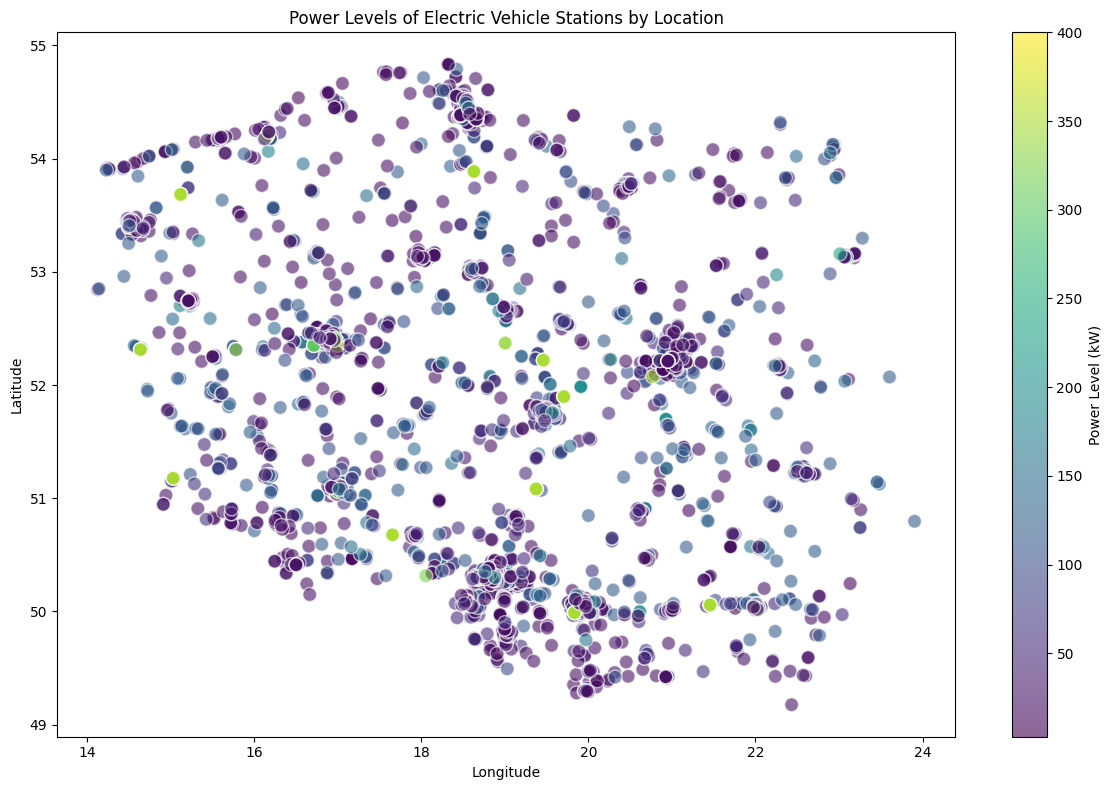

In [300]:
# Creating a scatter plot to analyze the relationship between power levels and geographical locations
plt.figure(figsize=(12, 8))
plt.scatter(df_stations['longitude_x'], df_stations['latitude_x'], c=df_stations['station_power'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.colorbar(label='Power Level (kW)')
plt.title('Power Levels of Electric Vehicle Stations by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
# plt.savefig('power_levels_scatter_plot.png')
plt.show()

We can make it a bit more readable for those who are not so familiar with Polish cities - add map in the background.

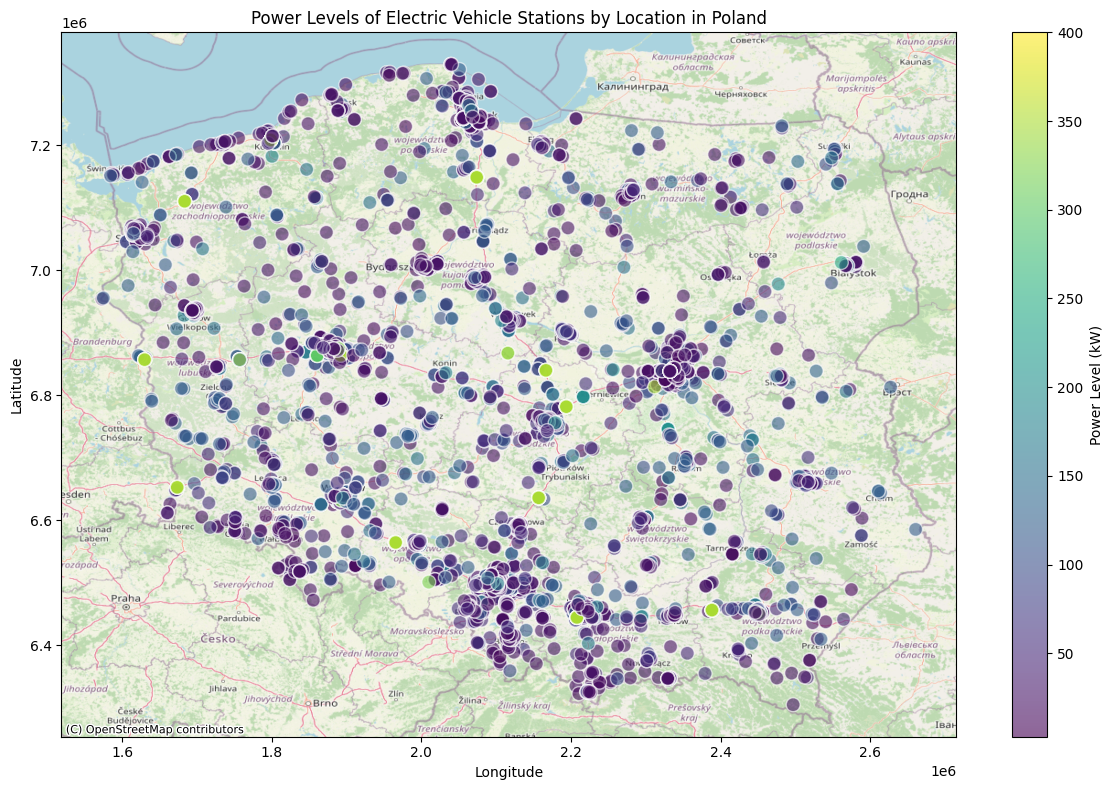

In [305]:
# Ensure the CRS is set to WGS84 (EPSG:4326), then transform to EPSG:3857 for compatibility with contextily

# Check if `gdf` has a CRS; if not, set it to EPSG:4326 (WGS84, commonly used for lat/lon)
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Transform to EPSG:3857 for compatibility with contextily's basemaps
gdf = gdf.to_crs(epsg=3857)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of station locations with color representing power level
scatter = ax.scatter(
    gdf['geometry'].x,
    gdf['geometry'].y,
    c=gdf['station_power'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    s=100
)

# Add basemap with OpenStreetMap as the source
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add color bar for power levels
cbar = plt.colorbar(scatter, ax=ax, label='Power Level (kW)')

# Set titles and labels
plt.title('Power Levels of Electric Vehicle Stations by Location in Poland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


The scatter plot illustrating the relationship between power levels and geographical locations allows us to observe how power levels vary across different locations, with color intensity indicating the power level of each station, which can inform decisions about infrastructure development and investment.

EV Drivers who need to make as little breaks as possible, like salespeople, can use this visualization to plan their trip and charge only on stations which offer huge power level.


#### Bar Chart

C:\Users\DanielPawlak\AppData\Local\Temp\ipykernel_29940\2771330020.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




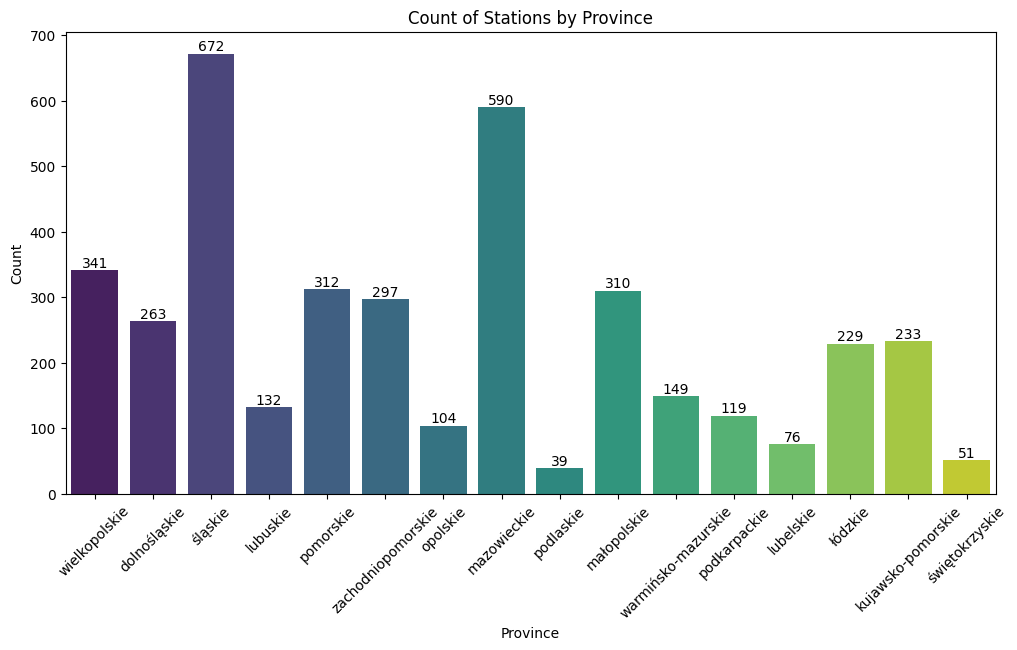

In [273]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_stations, x='location.province', palette='viridis')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display the height (count) as an integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the center of each bar
                ha='center', va='bottom',  # Center the text horizontally, place it above the bar
                fontsize=10, color='black')  # Customize text appearance

# Add title and labels
plt.title('Count of Stations by Province')
plt.xlabel('Province')
plt.ylabel('Count')

# Rotate x-axis labels for better fit
plt.xticks(rotation=45)

plt.show()


In [272]:
# Count of stations by province and station type
province_station_counts = df_stations.groupby(['location.province', 'station_type']).size().reset_index(name='Count')

# Plotly stacked bar chart with qualitative color palette
fig = px.bar(
    province_station_counts,
    x='location.province',
    y='Count',
    color='station_type',  # Split by station type
    barmode='group',  # Stacked bars
    title='Count of Stations by Province and Station Type',
    color_discrete_sequence=px.colors.qualitative.Set2  # Use a qualitative color palette
)
# Adjust bar width (smaller width makes bars thinner, larger makes them thicker)
fig.update_traces(width=0.39)  # Adjust width as desired, e.g., 0.5 for narrower bars, 0.8 for wider bars

# Update layout for better readability
fig.update_layout(
    xaxis_title='Province',
    yaxis_title='Count',
    title_x=0.5,
    margin=dict(t=80, b=40, l=40, r=40),
    legend_title_text='Station Type'
)

# Rotate x-axis labels for readability
fig.update_xaxes(tickangle=-45)

fig.show()


#### Diverging Bar Chart

In [279]:
# Aggregate the data by province and station_type
province_data = df.groupby(['location.province', 'station_type']).size().reset_index(name='num_charge_points')

# Separate data into AC and DC, with negative values for AC
ac_data = province_data.loc[province_data['station_type'] == 'AC'].copy()  # Add .copy() to avoid warning
dc_data = province_data.loc[province_data['station_type'] == 'DC'].copy()  # Add .copy() to avoid warning

# Convert AC values to negative for diverging chart
ac_data['num_charge_points'] = -ac_data['num_charge_points']

# Ensure we have data for each province in both AC and DC for display purposes
all_provinces = province_data['location.province'].unique()
ac_data = ac_data.set_index('location.province').reindex(all_provinces).fillna(0).reset_index()
dc_data = dc_data.set_index('location.province').reindex(all_provinces).fillna(0).reset_index()

# Create figure
fig = go.Figure()

# Add AC stations as negative values for the left side
fig.add_trace(go.Bar(
    x=ac_data['num_charge_points'],
    y=ac_data['location.province'],
    orientation='h',
    name='AC',
    marker=dict(color='lightcoral'),
    hoverinfo='text',
    hovertext=ac_data['num_charge_points'].apply(lambda x: f"Charge Points: {abs(x)}")
))

# Add DC stations as positive values for the right side
fig.add_trace(go.Bar(
    x=dc_data['num_charge_points'],
    y=dc_data['location.province'],
    orientation='h',
    name='DC',
    marker=dict(color='lightblue'),
    hoverinfo='text',
    hovertext=dc_data['num_charge_points'].apply(lambda x: f"Charge Points: {x}")
))
    # xaxis=dict(title="Number of Charge Points", tickvals=[-max(ac_data['num_charge_points']), 0, max(dc_data['num_charge_points'])]),
# Update layout for diverging bar chart
fig.update_layout(
    title="Number of AC and DC Charge Points by Province",
    title_x=0.5,
        xaxis=dict(
        title="Number of Charge Points",
        tickvals=[min(ac_data['num_charge_points']), 0, max(dc_data['num_charge_points'])],
        ticktext=[f"{abs(min(ac_data['num_charge_points']))}", "0", f"{max(dc_data['num_charge_points'])}"]  # Display positive value
    ),
    yaxis=dict(title="Province", automargin=True),
    barmode='relative',
    margin=dict(t=80, b=40, l=60, r=40)
)

fig.show()


### Stations Details

As we saw some nice maps with general information, we can dig deeper into details about the stations.

At first let's have a look how many stations share the same power and type using treemap chart

#### Treemap

A Treemap visualization is a way to represent hierarchical data using nested rectangles, making it a valuable tool for displaying proportions across multiple categories within a larger dataset. Each branch of the hierarchy is represented by a rectangle, with sub-branches nested within their parent rectangles. The size and color of each rectangle (or cell) can convey additional information about the data.

In [39]:
### Piękna wizka krajów, ale nie do tego
# import plotly.express as px
# import numpy as np
# df = px.data.gapminder().query("year == 2007")
# fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
#                   color='lifeExp', hover_data=['iso_alpha'],
#                   color_continuous_scale='RdBu',
#                   color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

In [86]:
# Count occurrences of each combination of station_type and station_power
df_stations_counts = df_stations.groupby(['station_type', 'station_power']).size().reset_index(name='count')

In [88]:
# Create the treemap with station_type as the parent and station_power as the child
fig = px.treemap(df_stations_counts, path=[px.Constant(""), 'station_type', 'station_power'],
                 values='count', color='station_power',
                 color_continuous_scale='RdBu',
                 range_color=(df_stations_counts['station_power'].min(), df_stations_counts['station_power'].max()))

# Update layout margins and show the figure
fig.update_layout(margin=dict(t=25, l=25, r=25, b=25))
fig.show()


It looks great, but scale is linear, and we see there are a lot of values in station_power close to each other, let's try to differentiate the scale.

In [99]:
# Define a custom color scale for improved resolution in lower values and smoother for high values
custom_color_scale = [
    (0.0, 'rgb(20, 40, 90)'),      # Very dark blue for the lowest values (e.g., 3-4)
    (0.02, 'rgb(40, 70, 130)'),    # Dark blue for values around 5-6
    (0.04, 'rgb(60, 100, 170)'),   # Medium blue for values around 7-8
    (0.06, 'rgb(80, 130, 190)'),   # Light-medium blue for values around 9-10
    (0.08, 'rgb(100, 150, 200)'),  # Lighter blue around 15
    (0.1, 'rgb(120, 170, 210)'),   # Light aqua around 20
    (0.15, 'rgb(140, 190, 220)'),  # Light blue around 22
    (0.2, 'rgb(160, 200, 230)'),   # Pale blue around 25
    (0.25, 'rgb(180, 210, 235)'),  # Very light blue near 30
    (0.3, 'rgb(190, 215, 240)'),   # Slightly lighter than above, for values around 32
    (0.35, 'rgb(200, 225, 245)'),  # Distinct blue for values around 35
    (0.375, 'rgb(210, 235, 250)'), # Lighter blue around 37
    (0.4, 'rgb(220, 240, 255)'),   # Light sky blue for values around 40
    (0.425, 'rgb(230, 245, 255)'), # Pale blue for values around 42
    (0.45, 'rgb(240, 250, 255)'),  # Very pale blue around 45
    (0.475, 'rgb(248, 252, 255)'), # Lightest blue close to white, for values around 48
    (0.5, 'rgb(255, 255, 255)'),   # White for 50
    (0.6, 'rgb(255, 240, 200)'),   # Light yellow above 50
    (0.7, 'rgb(255, 225, 180)'),   # Soft yellow-peach around 60
    (0.8, 'rgb(255, 200, 160)'),   # Peach for mid-high range
    (0.9, 'rgb(250, 150, 130)'),   # Light orange-red around 100
    (1.0, 'rgb(220, 100, 90)')     # Muted red for the highest values
]




# Set the color scale range explicitly to span from the minimum to maximum of station_power
fig = px.treemap(df_stations_counts, path=[px.Constant(""), 'station_type', 'station_power'],
                 values='count', color='station_power',
                 color_continuous_scale=custom_color_scale,
                 range_color=(df_stations_counts['station_power'].min(), df_stations_counts['station_power'].max()))

# Update layout margins and show the figure
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


Now after the chart is adjusted it is clearly visible where one the power scale particular rectangle belongs without hoovering over it to see the details. Color scale can be changed further, but this is fair enough. 

Looking at this visualization can give us a feeling that something is wrong. AC stations fall into the darker part of the scale, cause AC station can provide at best 22 kW (230 V x 32 A x 3 phases / 1000 = 22 kW), and here is one rectangle which shows there are 4 AC stations with power 120 kW. Evidently that's a mistake from operator's side. What else can we see here?

In [315]:
# Count the occurrences of 100, 120, or 150 in the 'station_power' column
count = len(df_stations.loc[df_stations['station_power'].isin([100, 120, 150])])/len(df_stations.loc[df_stations['station_type'] == "DC"])
count

0.38596491228070173

We can clearly see that stations with power of 22 kW are the most common ones, but 11 kW are also popular. AC stations are great for daily charging, but if you go for a trip or drive a lot every day, you will use DC stations as these allow a faster charging. 

Here the most popular stations are those with 50 kW power, which is not the best result, but 100, 120 and 150 kW stations combined share about 40% of all the DC stations, which is a good result. 

Closer to a red color we see stations with the biggest power, where we can find even 400 kW!

We can also see that number of AC stations is still greater than number of DC stations. What is the exact share of each type of station? Let's have a look at the following pie chart.

#### Pie chart

In [102]:
# Group data by `station_type` and `power` to get counts/sizes for the treemap
stations_grouped = df.groupby(['station_type', 'charge_point_power']).size().reset_index(name='num_stations')

In [103]:
fig = px.pie(stations_grouped, 
             values='num_stations', 
             names='station_type', 
             title='Chargers Network by Station Type',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textinfo='percent+label')
fig.show()


Those numbers are close, which is a good information for those who drive a lot on a daily basis or want to use their EV for a trip. It will change, as new DC stations are essential for EV market growth, and EV market will not grow without a good DC stations network.
    
But why do we even analyze station power, not the charge point power? Because when you are a EV Driver you want to know what is the max power available to charge your EV on particular station. 

However, to analyze total charging power provided by operators, we need to make an analysis on charge points. Hence, from now on, we will focus on this.   

## Charge Points Analysis

Here, we dive deeper into the details of the charge points within each station. We analyze their power levels, count, and utilization patterns. This section provides insights into the quality and efficiency of the charging infrastructure.

In [ ]:
# Group by power and station_type, and count occurrences
charge_points_grouped = df.groupby(['charge_point_type', 'charge_point_power']).size().reset_index(name='num_charge_points')

#### Two charts of the same data - Bar Chart and Dot Plot

Charts show the distribution of num_charge_points on the y-axis and power on the x-axis.

In [ ]:
# Create a grouped bar chart with categories
fig = px.bar(charge_points_grouped, 
             x='charge_point_power', 
             y='num_charge_points', 
             color='charge_point_type',  # Color by station type
             barmode='group',  # Group bars by station_type
             text='num_charge_points',  # Show number of connectors as text on bars
             labels={'charge_point_power': 'Charge Point Power', 'num_charge_points': 'Number of Charge Points'}, 
             title='Number of Charge Points vs Charge Point Power by Charge Point Type')

# Update layout for aesthetics
fig.update_layout(
    template='plotly_dark',  # Dark theme for a more modern look
    xaxis=dict(title='Charge Point Power', tickangle=-45),  # Rotate x-axis labels
    yaxis_title='Number of Charge Points',
    title_font=dict(size=24),  # Increase title font size
    title_x=0.5,  # Center the title
    legend_title_text='Charge Point Type',  # Add legend title
    bargap=0.1  # Add small gap between bars
)

# Add hover mode to show charge_point_type and other details
fig.update_traces(
    hovertemplate="<br>".join([
        "Charge Point Power: %{x}",
        "Number of Charge Points: %{y}",
        "Charge Point Type: %{color}"
    ])
)

# Show plot
fig.show()


In [ ]:
# Create a dot plot with categories
fig = px.scatter(charge_points_grouped, 
                 x='charge_point_power', 
                 y='num_charge_points', 
                #  size='num_connectors',  # Size based on the number of connectors
                 color='station_type',  # Color by station type
                 title='Number of Charge Points vs Charge Point Power by Charge Point Type')

# Update layout for aesthetics
fig.update_layout(
    template='plotly_dark',  # Dark theme for a more modern look
    xaxis=dict(title='Charge Point Power', tickangle=-45),  # Rotate x-axis labels
    yaxis_title='Number of Charge Points',
    title_font=dict(size=24),  # Increase title font size
    title_x=0.5,  # Center the title
    legend_title_text='Station Type',  # Add legend title
    bargap=0.1  # Add small gap between bars
)

# Add hover mode to show charge_point_type and other details
fig.update_traces(
    hovertemplate="<br>".join([
        "Charge Point Power: %{x}",
        "Number of Charge Points: %{y}",
        "Charge Point Type: %{color}"
    ])
)


fig.show()

#### Pie Chart
A pie chart shows the percentage of charge points by charge point type.

In [21]:
fig = px.pie(charge_points_grouped, 
             values='num_charge_points', 
             names='charge_point_type', 
             title='Chargers Network by Charge Point Type',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textinfo='percent+label')
fig.show()


We can see that share of DC Stations is greater than share of DC Charge Points. It is reasonable, as both DC and AC Charge Points can belong to DC Station, whereas only AC Charge Points can belong to AC Stations.

Let's have a look at the details of both DC and AC Charge Points and compare it side by side with different types of charts.

In [ ]:
# Filter for AC and DC charge points
ac_charge_points = charge_points_grouped[charge_points_grouped['charge_point_type'] == 'AC']
dc_charge_points = charge_points_grouped[charge_points_grouped['charge_point_type'] == 'DC']

In [ ]:
# Get top N AC charge points
top_n_ac = 5
top_ac_charge_points = ac_charge_points.nlargest(top_n_ac, 'num_charge_points')
other_ac_connectors = ac_charge_points[~ac_charge_points.index.isin(top_ac_charge_points.index)]['num_charge_points'].sum()
other_ac_data = pd.DataFrame({'charge_point_type': ['Other'], 'num_charge_points': [other_ac_connectors], 'charge_point_power': "Other"})
final_ac_data = pd.concat([top_ac_charge_points, other_ac_data], ignore_index=True)
final_ac_data['legend_label'] = final_ac_data.apply(lambda row: f"AC, Power: {row['charge_point_power']} - Count: {row['num_charge_points']}", axis=1)

# Get top N DC charge points
top_n_dc = 10
top_dc_charge_points = dc_charge_points.nlargest(top_n_dc, 'num_charge_points')
other_dc_connectors = dc_charge_points[~dc_charge_points.index.isin(top_dc_charge_points.index)]['num_charge_points'].sum()
other_dc_data = pd.DataFrame({'charge_point_type': ['Other'], 'num_charge_points': [other_dc_connectors], 'charge_point_power': "Other"})
final_dc_data = pd.concat([top_dc_charge_points, other_dc_data], ignore_index=True)
final_dc_data['legend_label'] = final_dc_data.apply(lambda row: f"DC, Power: {row['charge_point_power']} - Count: {row['num_charge_points']}", axis=1)

# Create subplot layout for the two pie charts
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'pie'}]],
    subplot_titles=[f"Top {top_n_ac} AC Charge Points and Others", f"Top {top_n_dc} DC Charge Points and Others"]
)

# Add AC pie chart
fig.add_trace(
    go.Pie(
        labels=final_ac_data['legend_label'],
        values=final_ac_data['num_charge_points'],
        hoverinfo='label+percent',
        textinfo='percent',
        marker=dict(colors=px.colors.sequential.Blues),  # Use a color scale for AC
    ),
    row=1, col=1
)

# Add DC pie chart
fig.add_trace(
    go.Pie(
        labels=final_dc_data['legend_label'],
        values=final_dc_data['num_charge_points'],
        hoverinfo='label+percent',
        textinfo='percent',
        marker=dict(colors=px.colors.sequential.Reds),  # Use a color scale for DC
    ),
    row=1, col=2
)

# Update layout for a cleaner look
fig.update_layout(
    title_text="Comparison of Top AC and DC Charge Points",
    title_x=0.5,
    title_y=0.95,
    showlegend=True,  # Hide global legend since each pie has its labels
    margin=dict(t=100, b=20, l=20, r=20),
)

# Display the combined figure
fig.show()


This is one way to show share of charge points grouped by power in each charge point type. We can notice that in DC Charge Points have a lot of power groups, hence grouping all of them but top 10 was a good idea when showing data using pie chart. 

But what is the exact share of every power group? Let's find out using other types of charts. 

#### Sunburst diagram

In [141]:
final_charge_points_grouped = charge_points_grouped.copy()
# Prepare data with a 'parent' column
final_charge_points_grouped['parent'] = final_charge_points_grouped['charge_point_type']  # Use type as parent for each power level

# Create the Sunburst chart
fig = px.sunburst(
    charge_points_grouped,
    path=['charge_point_type', 'charge_point_power'],  # Start directly with 'charge_point_type' (AC/DC)
    values='num_charge_points',
    title='Charge Points by Type and Power Level',
    color='charge_point_type',  # Color based on the type (AC, DC)
    color_discrete_map={'AC': 'lightblue', 'DC': 'lightcoral'}  # Define colors for AC and DC
)

# Customize hover information for a clean display
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Type: %{parent}<br>Count: %{value}"
)

# Adjust layout to center the title and increase margin for spacing
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin=dict(t=100, b=50, l=50, r=50),
    uniformtext=dict(minsize=10, mode='hide')  # Hide labels that don't fit well
)

fig.show()


It looks nice, but it is difficult to read power groups which are not a big part of all of the charge point groups of each type. To make it more readable, we will create a Treemap.

#### Treemap

In [ ]:
# Define a custom color scale for improved resolution in lower values and smoother for high values
custom_color_scale = [
    (0.0, 'rgb(20, 40, 90)'),      # Very dark blue for the lowest values (e.g., 3-4)
    (0.02, 'rgb(40, 70, 130)'),    # Dark blue for values around 5-6
    (0.04, 'rgb(60, 100, 170)'),   # Medium blue for values around 7-8
    (0.06, 'rgb(80, 130, 190)'),   # Light-medium blue for values around 9-10
    (0.08, 'rgb(100, 150, 200)'),  # Lighter blue around 15
    (0.1, 'rgb(120, 170, 210)'),   # Light aqua around 20
    (0.15, 'rgb(140, 190, 220)'),  # Light blue around 22
    (0.2, 'rgb(160, 200, 230)'),   # Pale blue around 25
    (0.25, 'rgb(180, 210, 235)'),  # Very light blue near 30
    (0.3, 'rgb(190, 215, 240)'),   # Slightly lighter than above, for values around 32
    (0.35, 'rgb(200, 225, 245)'),  # Distinct blue for values around 35
    (0.375, 'rgb(210, 235, 250)'), # Lighter blue around 37
    (0.4, 'rgb(220, 240, 255)'),   # Light sky blue for values around 40
    (0.425, 'rgb(230, 245, 255)'), # Pale blue for values around 42
    (0.45, 'rgb(240, 250, 255)'),  # Very pale blue around 45
    (0.475, 'rgb(248, 252, 255)'), # Lightest blue close to white, for values around 48
    (0.5, 'rgb(255, 255, 255)'),   # White for 50
    (0.6, 'rgb(255, 240, 200)'),   # Light yellow above 50
    (0.7, 'rgb(255, 225, 180)'),   # Soft yellow-peach around 60
    (0.8, 'rgb(255, 200, 160)'),   # Peach for mid-high range
    (0.9, 'rgb(250, 150, 130)'),   # Light orange-red around 100
    (1.0, 'rgb(220, 100, 90)')     # Muted red for the highest values
]

# Set the color scale range explicitly to span from the minimum to maximum of charge_point_power
fig = px.treemap(charge_points_grouped, path=[px.Constant(""), 'charge_point_type', 'charge_point_power'],
                 values='num_charge_points', color='charge_point_power',
                 color_continuous_scale=custom_color_scale,
                 range_color=(charge_points_grouped['charge_point_power'].min(), charge_points_grouped['charge_point_power'].max()))

# Update layout margins and show the figure
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


That looks way better! Even though values with little share are not so readable, their colors give a hint on what is the power of each rectangle.

#### Diverging Bar Chart (Side-by-Side for AC and DC)

In [ ]:
# Define the top N parameter
top_n = 10
# Filter for AC and DC stations
ac_stations = charge_points_grouped[charge_points_grouped['charge_point_type'] == 'AC']
dc_stations = charge_points_grouped[charge_points_grouped['charge_point_type'] == 'DC']
# Get the top N stations for both AC and DC based on the number of connectors charge_point_power
top_ac_stations = ac_stations.nlargest(top_n, 'num_charge_points')
top_dc_stations = dc_stations.nlargest(top_n, 'num_charge_points')

# Calculate "Other" category for AC and DC
other_ac_connectors = ac_stations[~ac_stations.index.isin(top_ac_stations.index)]['num_charge_points'].sum()
other_dc_connectors = dc_stations[~dc_stations.index.isin(top_dc_stations.index)]['num_charge_points'].sum()

# Create "Other" data for both AC and DC
other_ac_data = pd.DataFrame({
    'charge_point_type': ['AC'],
    'num_charge_points': [other_ac_connectors],
    'power': ["Other"],
    'label': ['Other'],
    'charge_point_label': [f'Other - {other_ac_connectors}  Charge Points']
})
other_dc_data = pd.DataFrame({
    'charge_point_type': ['DC'],
    'num_charge_points': [other_dc_connectors],
    'power': ["Other"],
    'label': ['Other'],
    'charge_point_label': [f'Other - {other_dc_connectors}  Charge Points']
})

# Combine top stations with "Other" category for both AC and DC
top_ac_stations['label'] = top_ac_stations.apply(lambda row: int(row['charge_point_power']), axis=1)
top_dc_stations['label'] = top_dc_stations.apply(lambda row: int(row['charge_point_power']), axis=1)

top_ac_stations['charge_point_label'] = top_ac_stations.apply(lambda row: f"{row['label']} kW - {row['num_charge_points']} Charge Points", axis=1)
top_dc_stations['charge_point_label'] = top_dc_stations.apply(lambda row: f"{row['label']} kW - {row['num_charge_points']} Charge Points", axis=1)

final_ac_data = pd.concat([top_ac_stations, other_ac_data], ignore_index=True)
final_dc_data = pd.concat([top_dc_stations, other_dc_data], ignore_index=True)

# Reverse AC values to plot on the left of zero
final_ac_data['num_charge_points'] = -final_ac_data['num_charge_points']

# Create figure
fig = go.Figure()

# Add AC stations on the left
fig.add_trace(go.Bar(
    x=final_ac_data['num_charge_points'],
    y=final_ac_data['label'].astype(str),
    orientation='h',
    name='AC Charge Points',
    marker=dict(color='lightcoral'),
    hoverinfo='text',
    hovertext=final_ac_data['charge_point_label']
))

# Add DC stations on the right
fig.add_trace(go.Bar(
    x=final_dc_data['num_charge_points'],
    y=final_dc_data['label'],
    orientation='h',
    name='DC Charge Points',
    marker=dict(color='lightblue'),
    hoverinfo='text',
    hovertext=final_dc_data['charge_point_label']
))

# Update layout for diverging bar chart
fig.update_layout(
    title=f"Diverging Bar Chart: Top {top_n} AC and DC Charge Point Power Groups and 'Other' Category",
    title_x=0.5,
    xaxis=dict(
        title="Number of Charge Points",
        tickvals=[min(final_ac_data['num_charge_points']), 0, max(final_dc_data['num_charge_points'])],
        ticktext=[f"{abs(min(final_ac_data['num_charge_points']))}", "0", f"{max(final_dc_data['num_charge_points'])}"]  # Display positive value
    ),
    yaxis=dict(title="Charge Point Power Groups"),
    barmode='relative',
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()

Only "Other" group is common in both Charge Point Types Top Power Groups, but I thought it would be nice to see this type of chart as well.

#### Bubble Chart 
A bubble chart adds another dimension by representing the product of power * num_charge_points as the bubble size.

In [211]:
# Bubble chart for power vs connectors with size representing power * num_connectors
charge_points_grouped['power_charge_point_product'] = charge_points_grouped['charge_point_power'] * charge_points_grouped['num_charge_points']

fig = px.scatter(charge_points_grouped, 
                 x='charge_point_power', 
                 y='num_charge_points', 
                 size='power_charge_point_product',  # Size based on power * num_charge_points
                 color='charge_point_type',  # Color by station type
                 title='Bubble Chart: Power vs Number of Charge Points')

fig.update_layout(xaxis_title='Charge Point Power', yaxis_title='Number of Charge Points')
fig.show()


This chart allows you to quickly identify total power provided by charge points power group. Still 22 kW AC Charge Point Power Group is the leader, but 150 kW DC Charge Point Power Group does not stand off so much.

#### Bar Chart - Total Power by Charge Point Type
A bar chart for total power usage (power * num_connectors) per charge point type.

In [222]:
# Group by station_type and sum of power * num_connectors
df_summed = charge_points_grouped.groupby('charge_point_type')['power_charge_point_product'].sum().reset_index()

fig = px.bar(df_summed, 
             x='charge_point_type', 
             y='power_charge_point_product', 
             title='Total Power Provided by Charge Point Type',
             color='charge_point_type',  # Color by 'charge_point_type'
             color_discrete_map={'AC': '#2a9d8f', 'DC': '#f4a261'}  # Teal for AC, Coral for DC
            )

fig.update_layout(
    xaxis_title='Charge Point Type', 
    yaxis_title='Total Power * Number of Charge Points'
)
fig.show()


We can see that power provided by DC Charge Points is greater than the power provided by AC Charge Points. What is the exact share? Let's use Pie Chart once again.

#### Pie Chart - Total Power by Charge Point Type

In [240]:
df_summed = charge_points_grouped.groupby('charge_point_type')['power_charge_point_product'].sum().reset_index()
fig = px.pie(df_summed, 
             values='power_charge_point_product', 
             names='charge_point_type', 
             title='Total Power Provided by Charge Point Type',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_traces(textinfo='percent')
fig.show()


Now it is clearly visible that power provided by DC Charge Points is about 70% of total power in Polish Public Charging Network.

What can we say about average power of charge point?

#### Bar Chart - Mean Power by Charge Point Type

In [332]:
avg_power_by_type = df.groupby('charge_point_type')['charge_point_power'].mean().reset_index()

fig = px.bar(avg_power_by_type, 
             x='charge_point_type', 
             y='charge_point_power', 
             title='Total Power Provided by Charge Point Type',
             color='charge_point_type',  # Color by 'charge_point_type'
             color_discrete_map={'AC': '#1f77b4', 'DC': '#ff7f0e'}  # Teal for AC, Coral for DC
            )

fig.update_layout(
    xaxis_title='Charge Point Type', 
    yaxis_title='Total Power * Number of Charge Points'
)
fig.show()

Significant dominance of 22 kW AC Charge Points result in having mean power at about 22 kW, and DC Charge Points mean power is more than 100 kW and we can expect it will grow bigger soon!

## Operator Analysis

Finally, we examine the operators managing these stations. By analyzing their portfolios, regional focus, and strategies, we aim to uncover trends and identify key players in the EV charging industry. This part highlights the competitive dynamics and priorities of operators in developing the network.

#### Bar chart

We want to see how many charge points each operator has in its network. Bar chart is the first choice to visualize it.

In [13]:
charge_point_counts = df['short_name'].value_counts().reset_index()
charge_point_counts.columns = ['short_name', 'charge_point_count']

# Create a bar chart with Plotly
fig = px.bar(
    charge_point_counts,
    x='short_name',
    y='charge_point_count',
    title='Count of Charge Points by Operator',
    labels={'short_name': 'Operator Name', 'charge_point_count': 'Number of Charge Points'},
    color='charge_point_count',  # Color by count for gradient effect
    color_continuous_scale=px.colors.sequential.Teal  # Choose a color palette
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,  # Center the title
    margin=dict(t=80, b=40, l=40, r=40),  # Adjust margins for spacing
    xaxis_tickangle=45  # Rotate x-axis labels for readability
)

# Show values on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the figure
fig.show()

This chart is not very readable, hence we will focus on top 20 operators and add the rest to "Others" group.

In [387]:
# Separate the top 20 stations
top_20_charge_points = charge_point_counts.nlargest(20, 'charge_point_count')
others_count = charge_point_counts.loc[~charge_point_counts['short_name'].isin(top_20_charge_points['short_name']), 'charge_point_count'].sum()

# Add "Others" to the top 20 DataFrame
top_20_with_others = pd.concat([top_20_charge_points, pd.DataFrame({'short_name': ['Others'], 'charge_point_count': [others_count]})])

# Create the bar chart
fig = px.bar(
    top_20_with_others,
    x='short_name',
    y='charge_point_count',
    title='Top 20 Operators by Number of Charge Points (with Others)',
    labels={'short_name': 'Operator Name', 'charge_point_count': 'Number of Charge Points'},
    color='charge_point_count',  # Color by count for gradient effect
    color_continuous_scale=px.colors.sequential.Teal  # Choose a color palette
)

# Customize layout for better readability
fig.update_layout(
    title_x=0.5,  # Center the title
    height=700,
    width=1300,
    margin=dict(t=80, b=40, l=40, r=40),  # Adjust margins for spacing
    xaxis_tickangle=45  # Rotate x-axis labels for readability
)

# Show values on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the figure
fig.show()

There is a notable disparity between the operator with the largest number of charge points and the others. The leading operator dominates the market, with a significantly larger share of charge points compared to the rest. This creates a clear distinction, as most other operators have a much smaller footprint in terms of charging infrastructure. This concentration of charge points in the hands of a few operators may indicate that the market is still in its early stages, with larger players gaining a substantial advantage. Furthermore, it suggests that consumers may have fewer choices in terms of charging networks, particularly in regions where smaller operators are less present. Expanding infrastructure and increasing competition could help address this imbalance and improve accessibility for electric vehicle users.

#### Sunburst

The following visualization highlights not only the operators with the largest share of the network but also the ratio of AC to DC charge points for each operator. Let's focus on analyzing the Top 10 operators.

In [427]:
# Group by 'short_name' and 'charge_point_type' and count the charge points
sunburst_data = df.groupby(['short_name', 'charge_point_type']).size().reset_index(name='charge_point_count')

# Get top 10 operators by total charge points, then aggregate the rest under 'Others'
top_10_operators = sunburst_data.groupby('short_name')['charge_point_count'].sum().nlargest(10).index
sunburst_data['short_name'] = sunburst_data['short_name'].apply(lambda x: x if x in top_10_operators else 'Others')

# Custom color map for teal shades
custom_colors = {
    'Total Chargers': '#008080',  # Teal center
    'Others': '#a0d9d6',  # Lighter teal for "Others" category
}
# Generate lighter shades for each station type in top 20
for idx, name in enumerate(sunburst_data['short_name'].unique()):
    custom_colors[name] = f'rgba(0,128,128,{1 - idx*0.05})'  # Gradual lightening

# Create Sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['short_name', 'charge_point_type'],
    values='charge_point_count',
    title="Total Number of Charge Points by Operator and Charge Point Type",
    color='short_name',
    color_discrete_map=custom_colors
)

# Adjust layout for readability
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    width=1300,  # Larger width
    height=800,  # Larger height
    margin=dict(t=100, b=50, l=50, r=50),
    uniformtext=dict(minsize=10, mode='show')
)

# Display the chart
fig.show()


This chart looks really nice, but colors are too close to each other. Let's create another one with custom colors.

In [392]:
# Color palette with soft, calm tones
calm_colors = [
    '#1f5a64',  # Rich teal (dark teal)
    '#2a9d8f',  # Teal (starting color)
    '#4fa3a1',  # Light teal
    '#6c9eaf',  # Soft blue-gray
    '#8ea7c3',  # Slate blue
    '#b0c1d1',  # Soft gray-blue
    '#d1d8e0',  # Light blue-gray
    '#f0f4f8',  # Very light gray (towards the edge of blue tones)
    '#e0e7f1',  # Lightest gray-blue
    '#b8c8d8',  # Pale slate gray
    '#adb5bd'   # Light gray for "Others"
]

# Assign colors for each short_name, plus a lighter version for charge_point_type
# custom_colors = {'Others': '#adb5bd'}  # Soft gray for "Others" category
for idx, name in enumerate(sunburst_data['short_name'].unique()):
    base_color = calm_colors[idx % len(calm_colors)]  # Rotate through the calm color palette
    custom_colors[name] = base_color

# Create the Sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['short_name', 'charge_point_type'],
    values='charge_point_count',
    title="Total Number of Charge Points by Operator and Charge Point Type",
    color='short_name',
    color_discrete_map=custom_colors
)

# Adjust layout for readability
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    width=1300,  # Larger width
    height=800,  # Larger height
    margin=dict(t=100, b=50, l=50, r=50),
    uniformtext=dict(minsize=10, mode='show')
)

# Display the chart
fig.show()


Here we can observe that the operator with the short name **GWPL**, representing **GreenWay Polska Sp. z o.o.**, holds the largest share of all public charge points in Poland. Additionally, this operator's network of AC and DC charge points is fairly balanced, with a slightly higher number of DC charge points. Alongside GWPL, the second-largest operator, **Power Dot Poland**, has a similar AC-to-DC ratio in its network. These two operators stand out, as most other operators focus primarily on AC stations. This suggests that if you need to charge quickly, GWPL or Power Dot Poland would be the likely choices, given their significant share of DC charge points in the country. The third operator in this regard is **ORLEN**, whose entire network is roughly the size of just Power Dot Poland's DC charge points.

#### Heatmap

**Charge Point Density per Operator in Different Regions**

This visualizes the concentration of charge points by operator in different provinces or districts.

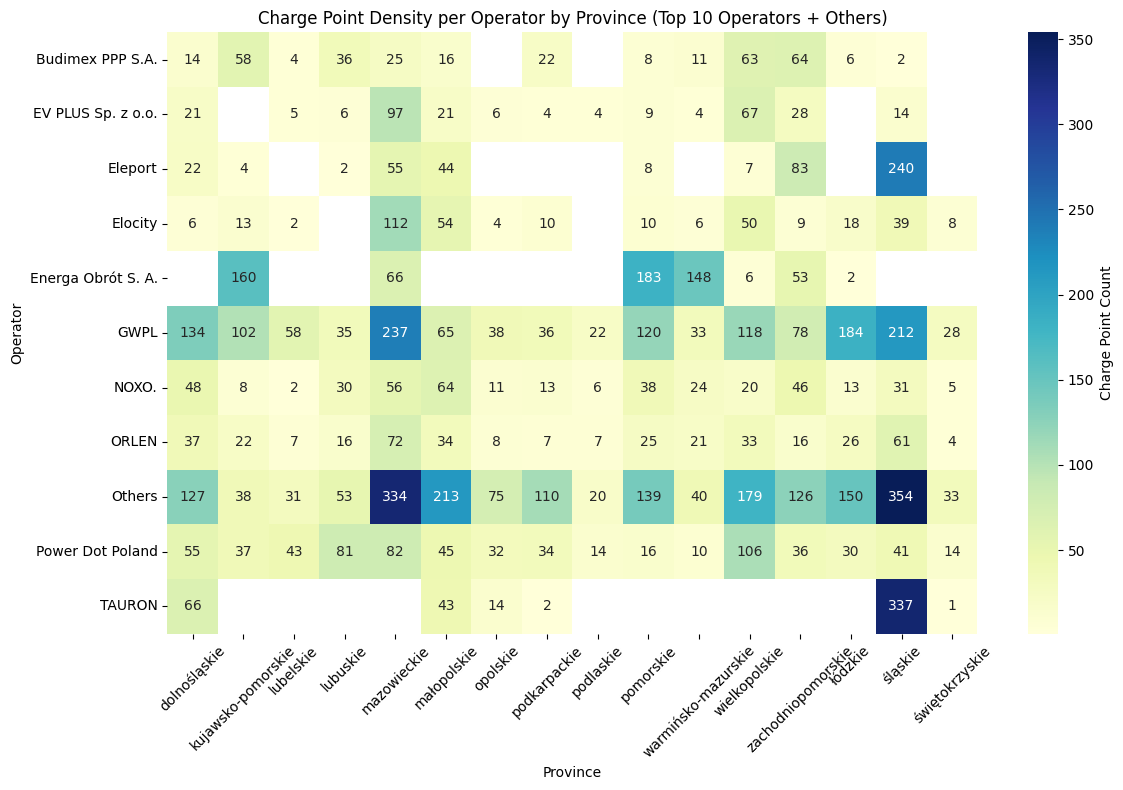

In [433]:
# Aggregate count of charge points per operator in each province
operator_province_counts = df.groupby(['short_name', 'location.province']).size().reset_index(name='charge_point_count')

# Get the top 10 operators by overall charge point count
top_10_operators = (
    operator_province_counts.groupby('short_name')['charge_point_count'].sum()
    .nlargest(10).index
)

# Mark operators not in the top 10 as "Others"
operator_province_counts['short_name'] = operator_province_counts['short_name'].apply(
    lambda x: x if x in top_10_operators else 'Others'
)

# Re-aggregate the data to include "Others"
heatmap_data = operator_province_counts.groupby(['short_name', 'location.province'])['charge_point_count'].sum().reset_index()

# Create pivot table for the heatmap (using keyword arguments)
heatmap_pivot = heatmap_data.pivot(index='short_name', columns='location.province', values='charge_point_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Charge Point Count'})
plt.title('Charge Point Density per Operator by Province (Top 10 Operators + Others)')
plt.xlabel('Province')
plt.ylabel('Operator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


At first glance, it’s clear that most operators concentrate their charging networks in the mazowieckie and śląskie provinces. This makes sense, as mazowieckie includes the capital, Warsaw, while śląskie is a major industrial hub in Poland. These areas naturally draw higher demand for EV infrastructure due to population density, business activity, and traffic volume.

Another interesting insight is that some operators have no charge points in certain regions. This indicates gaps in the current EV network, suggesting significant room for expansion. For Poland to foster a truly accessible EV ecosystem, expanding infrastructure to cover these underserved areas is key. A more comprehensive network would help potential EV buyers feel confident they can travel throughout the country without worrying about charging availability.

Let's examine the AC-to-DC ratio for each operator across different regions.

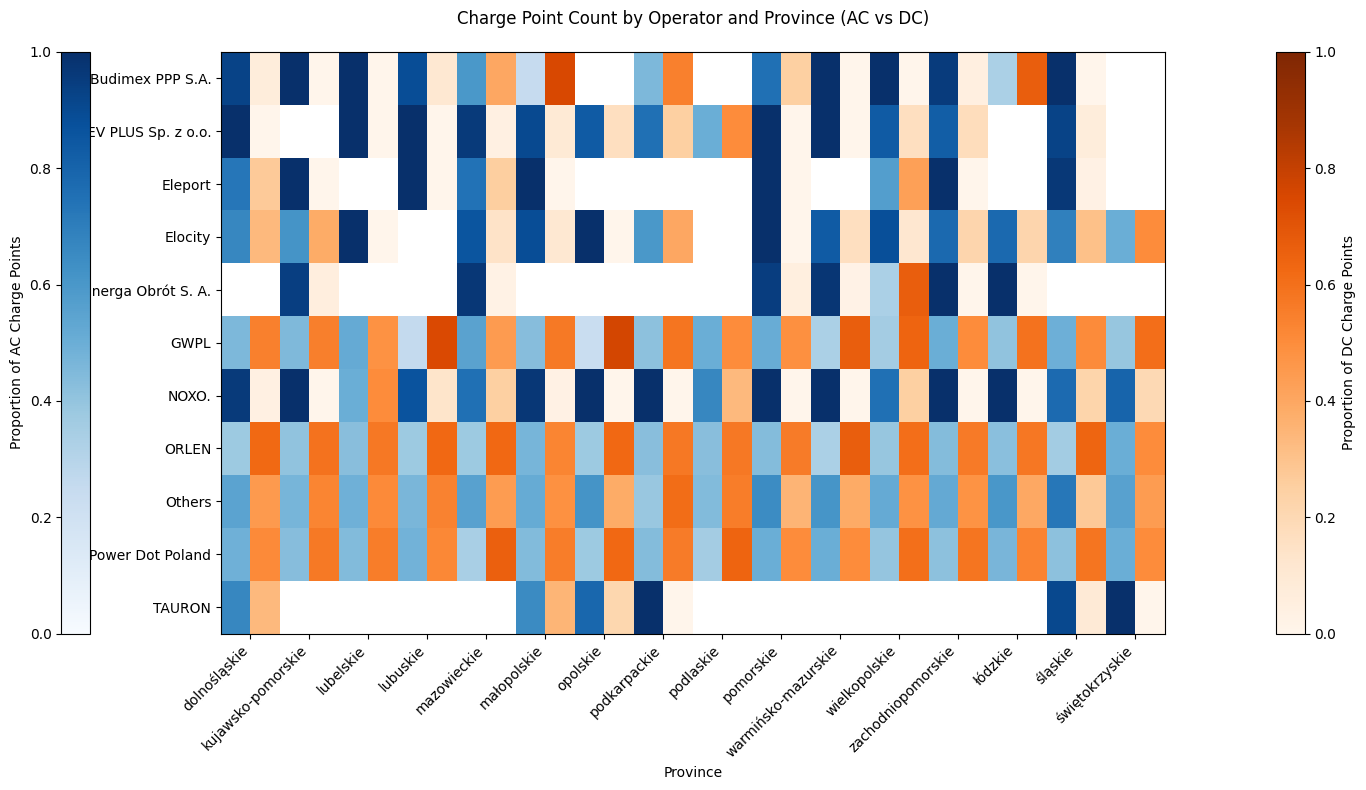

In [ ]:
# Aggregate the count of charge points by operator, province, and charge_point_type
operator_province_type_counts = df.groupby(
    ['short_name', 'location.province', 'charge_point_type']
).size().reset_index(name='charge_point_count')

# Step 2: Get the top 10 operators by total charge points
top_10_operators = (
    operator_province_type_counts.groupby('short_name')['charge_point_count'].sum()
    .nlargest(10).index
)

# Mark operators not in the top 10 as "Others"
operator_province_type_counts['short_name'] = operator_province_type_counts['short_name'].apply(
    lambda x: x if x in top_10_operators else 'Others'
)

# Step 4: Pivot the data to separate AC and DC counts
heatmap_data = operator_province_type_counts.pivot_table(
    index=['short_name', 'location.province'],
    columns='charge_point_type',
    values='charge_point_count',
    fill_value=0
).reset_index()

# Reformat the data for plotting
heatmap_pivot = heatmap_data.pivot(index='short_name', columns='location.province', values='AC')
heatmap_pivot_dc = heatmap_data.pivot(index='short_name', columns='location.province', values='DC')

# Create a custom grid-based heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Define the colormap
colors_ac = plt.cm.Blues
colors_dc = plt.cm.Oranges

# Iterate over the grid and plot AC and DC proportions
for i, row in enumerate(heatmap_pivot.index):
    for j, col in enumerate(heatmap_pivot.columns):
        ac_count = heatmap_pivot.loc[row, col] if col in heatmap_pivot.columns else 0
        dc_count = heatmap_pivot_dc.loc[row, col] if col in heatmap_pivot_dc.columns else 0
        total_count = ac_count + dc_count
        
        # Plot AC portion
        if total_count > 0:
            ax.add_patch(plt.Rectangle((j, i), 0.5, 1, color=colors_ac(ac_count / total_count), lw=0))
            # Plot DC portion
            ax.add_patch(plt.Rectangle((j + 0.5, i), 0.5, 1, color=colors_dc(dc_count / total_count), lw=0))

        # # Add text for total count
        # ax.text(j + 0.5, i + 0.5, f"{total_count:.0f}", ha='center', va='center', fontsize=8, color='black')

# Format plot
ax.set_xticks(np.arange(len(heatmap_pivot.columns)) + 0.5)
ax.set_xticklabels(heatmap_pivot.columns, rotation=45, ha='right')
ax.set_yticks(np.arange(len(heatmap_pivot.index)) + 0.5)
ax.set_yticklabels(heatmap_pivot.index)
ax.set_xlim(0, len(heatmap_pivot.columns))
ax.set_ylim(0, len(heatmap_pivot.index))
ax.invert_yaxis()
ax.set_title('Charge Point Count by Operator and Province (AC vs DC)', pad=20)
ax.set_xlabel('Province')
ax.set_ylabel('Operator')

# Add colorbar legends for AC and DC
cbar_ac = fig.colorbar(plt.cm.ScalarMappable(cmap=colors_ac), ax=ax, location='left', fraction=0.05, pad=0.1)
cbar_dc = fig.colorbar(plt.cm.ScalarMappable(cmap=colors_dc), ax=ax, location='right', fraction=0.05, pad=0.1)
cbar_ac.set_label('Proportion of AC Charge Points')
cbar_dc.set_label('Proportion of DC Charge Points')

plt.tight_layout()
plt.show()


This heatmap highlights the focus of operators on different types of charge points across provinces. It reveals which operators prioritize AC or DC charge points in specific regions, helping us understand their strategies. For instance, provinces with more DC charge points may cater to long-distance travel, while those with more AC stations align with urban or residential needs. Gaps in operator presence in certain provinces suggest opportunities for network expansion.

To conclude this section, let’s explore the priorities of each operator regarding charge point power.

#### Scatter Plot

**Distribution of Charge Points by Charge Point Power**

A scatter plot to analyze the relationship between charge point power and charge points per operator.

In [30]:
# Prepare data for scatter plot
scatter_data = df.groupby(['short_name', 'charge_point_power']).size().reset_index(name='charge_point_count')

# Get top 10 operators by total charge points, then aggregate the rest under 'Others'
top_10_operators = scatter_data.groupby('short_name')['charge_point_power'].sum().nlargest(10).index

scatter_data['short_name'] = scatter_data['short_name'].apply(lambda x: x if x in top_10_operators else 'Others')

# Create scatter plot
fig = px.scatter(
    scatter_data,
    x='charge_point_power',
    y='short_name',
    color='short_name',
    title="Distribution of Charge Points by Charge Point Power",
    labels={'charge_point_power': 'Charge Point Power (kW)', 'charge_point_count': 'Number of Charge Points', "short_name": "Operators"},
    hover_data=['short_name', 'charge_point_power', "charge_point_count"]
)
fig.update_layout(title_x=0.5)
fig.show()


Some operators offer a full range of charge point power levels, while others maintain a narrower portfolio. This could indicate that they are relatively new in the market or reflect a strategic focus on specializing in a select range of products.

## Summary of Findings
1. AC vs. DC Charging Stations:

- Station Count: There are more AC (Alternating Current) charging stations compared to DC (Direct Current) stations, indicating a wider distribution of slower chargers.
- Number of Charge Points: The greater number of AC stations translates into more individual AC charge points. This suggests an emphasis on providing multiple, slower charging spots, likely for regular city driving or overnight parking.
2. Power Distribution:

- Despite AC stations and charge points outnumbering DC, the total power capacity of DC charge points is significantly higher. This is because DC chargers typically deliver much higher power, allowing for rapid charging.
- This setup seems to reflect an infrastructure that supports both regular urban commutes (with more accessible, slower AC points) and longer-distance travel (with higher-powered DC points for quick stops).
3. Geographical Concentration:

- The charging network is highly concentrated in major cities, highlighting urban areas as priority locations for EV infrastructure. This could indicate a strategy aimed at supporting densely populated areas where EV adoption is higher or where parking infrastructure can support charging station installation.
